 # Project 3: Python, Pandas, Matplotlib and Seaborn

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

For this project, I wanted to examine the data of the Nobel Prize laureates in history, in particular the amount of Nobel Prize laureates in each country in proportion to its population.

I expect that developed western nations, presumably nations in Europe and in North America, will perform the best in terms of Nobel laureates per capita. Beyond that, I would like to explore the differences between the Nobel Prize categories in terms of the countries that have had more Nobel laureates in each of them.

I sourced my data from Kaggle here:

https://kaggle.com/datasets/nobelfoundation/nobel-laureates

In [2]:
laureates = pd.read_csv("data/archive.csv")

Cleaning the dataframe and using only the relevant or noteworthy columns, including changing a value for consistency:

In [3]:
laureates_short = laureates[["Year", "Category", "Prize", "Motivation", "Laureate ID", "Full Name", "Sex", "Organization Name", \
                             "Birth Country", "Organization Country"]].sort_values(["Year", "Category"])
laureates_short.replace({"United States of America": "United States"}, inplace=True)

Displaying general information from the dataframe:

In [4]:
laureates_short

,Year,Category,Prize,Motivation,Laureate ID,Full Name,Sex,Organization Name,Birth Country,Organization Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,Jacobus Henricus van 't Hoff,Male,Berlin University,Netherlands,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,Sully Prudhomme,Male,NaN,France,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,Emil Adolf von Behring,Male,Marburg University,Prussia (Poland),Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,462,Jean Henry Dunant,Male,NaN,Switzerland,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,463,Frédéric Passy,Male,NaN,France,NaN
...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",927,Yoshinori Ohsumi,Male,Tokyo Institute of Technology,Japan,Japan
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",934,Juan Manuel Santos,Male,NaN,Colombia,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",928,David J. Thouless,Male,University of Washington,United Kingdom,United States
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",929,F. Duncan M. Haldane,Male,Princeton University,United Kingdom,United States


In [5]:
laureates_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Laureate ID           969 non-null    int64 
 5   Full Name             969 non-null    object
 6   Sex                   943 non-null    object
 7   Organization Name     722 non-null    object
 8   Birth Country         943 non-null    object
 9   Organization Country  716 non-null    object
dtypes: int64(2), object(8)
memory usage: 75.8+ KB


In [6]:
laureates_short.describe(include="object")

,Category,Prize,Motivation,Full Name,Sex,Organization Name,Birth Country,Organization Country
count,969,969,881,969,943,722,943,716
unique,6,579,565,904,2,315,121,29
top,Medicine,The Nobel Prize in Physics 2011,"""for their discoveries of machinery regulating...",Comité international de la Croix Rouge (Intern...,Male,University of California,United States,United States
freq,227,5,5,3,893,34,276,363


Since the columns related to countries are partially null, I'll examine prizes awarded which don't have data for either:

In [7]:
laureates_short[laureates_short["Birth Country"].isna() & laureates_short["Organization Country"].isna()]

,Year,Category,Prize,Motivation,Laureate ID,Full Name,Sex,Organization Name,Birth Country,Organization Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,467,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,477,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,503,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,508,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,509,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,515,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,482,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,523,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN


The columns are apparently both null only in cases of Nobel Peace Prizes given to organizations related to multiple countries or to no country. For the purpose of this project about the nationalities of Nobel laureates, it is reasonable to neglect these outliers in the data. For simplicity, for the rest of the project I will only use the Birth Country column, which has fewer null values, and I will address the problems with that approach later.

Now moving on to data about the population of each country in the world, also taken from Kaggle:

https://kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

In [8]:
populations = pd.read_csv("data/world_population.csv")

I will only use data from the year 2000 for consistency, since it should suffice for the purpose of comparing the relative population sizes:

In [9]:
pop_2000 = populations[["Rank", "Country/Territory", "Continent", "2000 Population", "World Population Percentage"]].sort_values("Rank")

Displaying general information from the dataframe:

In [10]:
pop_2000.head(10)

,Rank,Country/Territory,Continent,2000 Population,World Population Percentage
41,1,China,Asia,1264099069,17.88
92,2,India,Asia,1059633675,17.77
221,3,United States,North America,282398554,4.24
93,4,Indonesia,Asia,214072421,3.45
156,5,Pakistan,Asia,154369924,2.96
149,6,Nigeria,Africa,122851984,2.74
27,7,Brazil,South America,175873720,2.70
16,8,Bangladesh,Asia,129193327,2.15
171,9,Russia,Europe,146844839,1.81
131,10,Mexico,North America,97873442,1.60


In [11]:
pop_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 41 to 226
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country/Territory            234 non-null    object 
 2   Continent                    234 non-null    object 
 3   2000 Population              234 non-null    int64  
 4   World Population Percentage  234 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.0+ KB


First I will examine the countries which have had the most Nobel laureates in general throughout the years, with no regard to their population sizes:

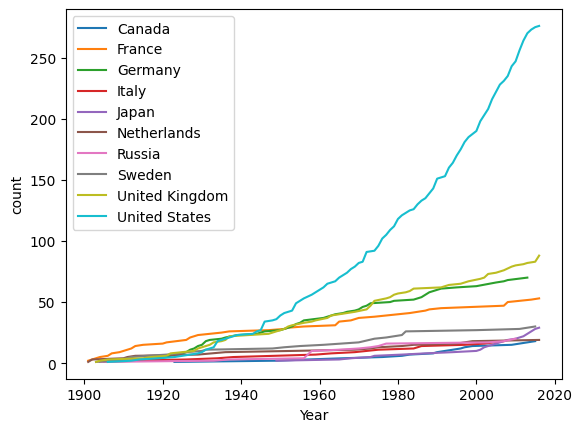

In [12]:
top_10 = laureates_short[laureates_short["Birth Country"].isin(laureates_short.value_counts("Birth Country").index[:10])].groupby("Birth Country")
for country in list(top_10.groups):
    sb.lineplot(laureates_short[laureates_short["Birth Country"] == country].value_counts("Year").sort_index().cumsum(), errorbar=None)

plt.legend(list(top_10.groups))
plt.show()

To give perspective, I will display the top 5 most populous countries:

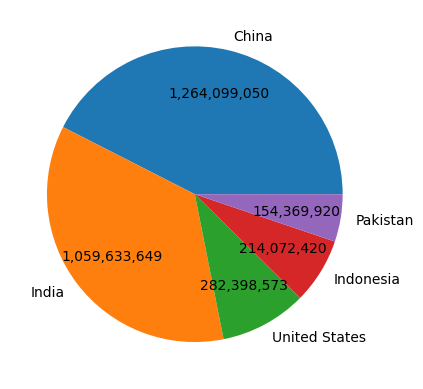

In [13]:
plt.pie(pop_2000["2000 Population"][:5], labels=pop_2000["Country/Territory"][:5],
        autopct=lambda x: f'{int(pop_2000["2000 Population"][:5].sum() * x/100):,}', pctdistance=0.7)
plt.show()

And some statistical data regarding population sizes:

In [14]:
pop_2000["2000 Population"].describe()

count    2.340000e+02
mean     2.626947e+07
std      1.116982e+08
min      6.510000e+02
25%      3.272420e+05
50%      4.292907e+06
75%      1.576230e+07
max      1.264099e+09
Name: 2000 Population, dtype: float64

The standard deviation of countries' populations is very high compared to the mean, with the few most and least populous countries having populations orders of magnitude different to most other countries.

Unrelated to countries, it is known that every country has roughly 50% of the population of each sex. However, females are extremely underrepresented as Nobel laureates, though their representation has improved in recent years, as we can see in this chart:

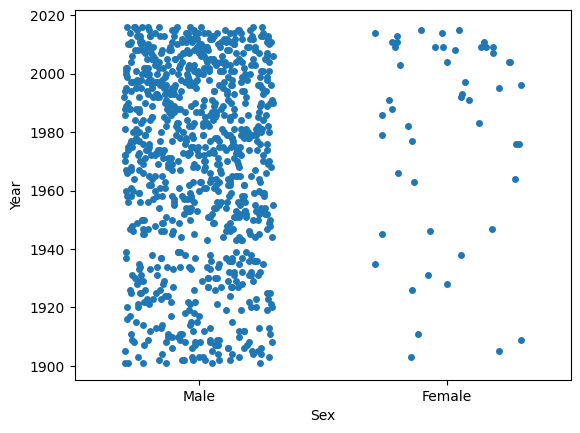

In [15]:
sb.stripplot(data=laureates_short, x="Sex", y="Year",jitter=0.3)
plt.show()

I will now join the two dataframes using only the countries that appear in both dataframes with the same spelling. That is why I changed the name of the United States in one of them. This will cause some of the countries to be omitted in the resulting dataframe - I will address the drawbacks and limitations of this method later.

In [16]:
nobel_countries = pd.merge(laureates_short, pop_2000, left_on="Birth Country", right_on="Country/Territory")
year_as_index = nobel_countries.set_index("Year")

We can examine the total amount of Nobel Prize laureates in each country among the countries the dataframe includes:

In [17]:
year_as_index.value_counts("Birth Country")

Birth Country
United States     276
United Kingdom     88
Germany            70
France             53
Sweden             30
Japan              29
Russia             20
Netherlands        19
Italy              18
Canada             18
Switzerland        17
Austria            15
Norway             13
China              12
Denmark            11
Australia          11
Belgium             9
South Africa        9
India               7
Spain               7
Poland              6
Egypt               6
Hungary             6
Romania             5
Ireland             5
Argentina           4
New Zealand         3
Mexico              3
Portugal            3
Liberia             2
Turkey              2
Guatemala           2
Chile               2
Luxembourg          2
Morocco             2
Finland             2
Colombia            2
Brazil              1
Bulgaria            1
Iran                1
Iceland             1
Costa Rica          1
Cyprus              1
Lithuania           1
Kenya             

Some statistical details regarding the amount of Nobel laureates in each country:

In [18]:
year_as_index.value_counts("Birth Country").describe()

count     55.000000
mean      14.672727
std       39.561979
min        1.000000
25%        1.000000
50%        3.000000
75%       11.500000
max      276.000000
Name: count, dtype: float64

We can see that some countries, especially the United States, skew the results a lot, and many countries have only 1 Nobel laureate.

I'll now calculate each country's amount of Nobel laureates in relation to its population size:

In [19]:
year_as_index["Relative Population"] = pop_2000["2000 Population"].sum() / year_as_index["2000 Population"]
adjusted = year_as_index.groupby("Birth Country").sum("Relative Population")["Relative Population"].sort_values(ascending=False)

Though the units I used are meaningless, here is a chart of the relative per capita amounts of countries' Nobel laureates:

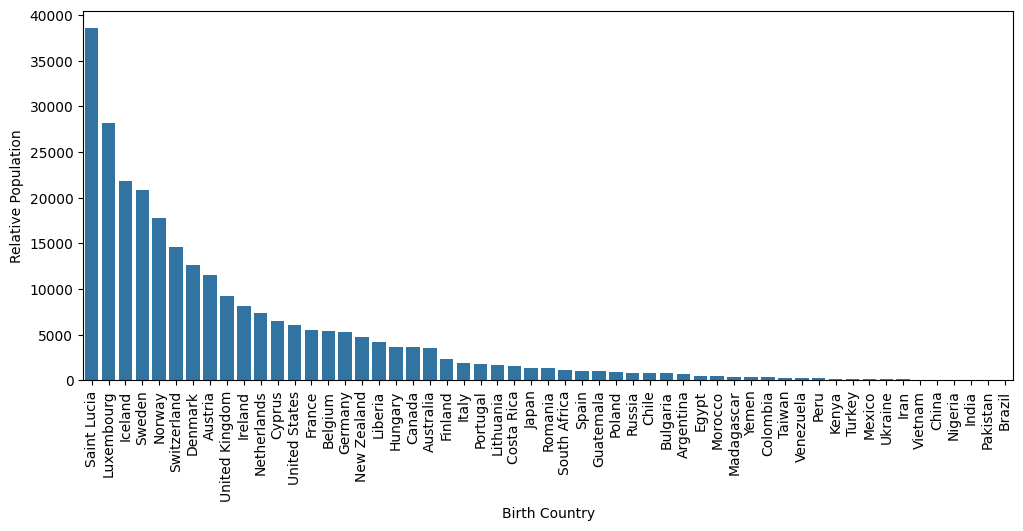

In [20]:
plt.figure(figsize=(12,4.8))
plt.xticks(rotation=90)
sb.barplot(adjusted)
plt.show()

Some small nations such as Saint Lucia, Luxembourg and Iceland are significantly overrepresented in the amount of Nobel Prize laureates per capita despite only having 1 or 2 laureates each. The rest of the top performers are western nations, mostly less populous European countries.

One problem with the approach I took is that it neglected several countries which have changed names in the past century, such as Mandatory Palestine (Today Israel) and countries that were part of the former Russian Empire.

I'll display more statistics about the relative per capita values of all countries, with the units I calculated:

In [21]:
adjusted.describe()

count       55.000000
mean      4771.171320
std       7746.285409
min         34.951531
25%        295.232192
50%       1402.164799
75%       5471.646757
max      38539.534188
Name: Relative Population, dtype: float64

We now see that while the standard deviation between the countries' total number of Nobel laureates was significantly larger than the mean, the standard deviation in the per capita rates of Nobel laureates is somewhat closer to the mean, yet still larger. It is natural that larger countries would produce more Nobel laureates, and normalizing for the per capita rates did bring the countries with the most laureates closer to the mean, while highlighting smaller countries. Still, many countries performed very poorly per capita and few excelled.

Now I want to examine each category of Nobel Prizes separately:

In [22]:
nobel_categories = list(laureates_short["Category"].drop_duplicates())
nobel_by_category = nobel_countries.groupby(["Category", "Birth Country"])["Year"].count().unstack(fill_value=0).stack()

I'll make a chart to help visualize the distinct categories the different countries have had more or less Nobel laureates in:

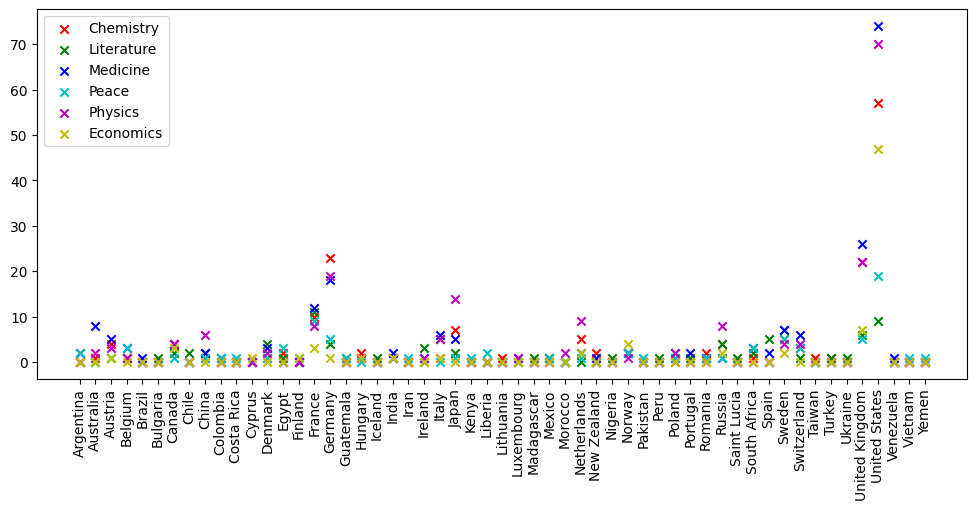

In [23]:
plt.figure(figsize=(12,4.8))
for i in range(6):
    plt.scatter(list(nobel_countries["Birth Country"].drop_duplicates().sort_values()), nobel_by_category[nobel_categories[i]],
                color=["r","g","b","c","m","y"][i], marker='x')
    plt.legend(nobel_categories)
    plt.xticks(rotation=90)
plt.show()

It seems that the countries with fewer total Nobel laureates have a high number of Nobel laureates in peace, economics and literature, while among countries with a medium or higher amount of Nobel laureates, there is a greater number of laureates in physics, medicine and chemistry.

This can be explained by checking the total amount of Nobel laureates registered in the database in each category:

In [24]:
nobel_countries.groupby("Category")["Year"].count().sort_values(ascending=False)

Category
Medicine      203
Physics       190
Chemistry     165
Literature     91
Peace          81
Economics      77
Name: Year, dtype: int64

This discrepancy is due to how many Nobel Prizes are awarded collaboratively to up to 3 people in any given year. We can note that due to the way I organized the data, several Nobel Peace Prizes awarded to multiple people or to organizations from multiple countries got omitted.

The dataframe included prizes from 1901 to 2016 - 116 years in total, and the partial data in the dataframe I use includes most but not all of the Nobel Prizes in literature, peace and economics, as well as many instances of Nobel Prizes in medicine, physics and chemistry awarded to multiple laureates, which got counted multiple times.

I'll make a chart to study the categories with a lot of collaborative prizes awarded:

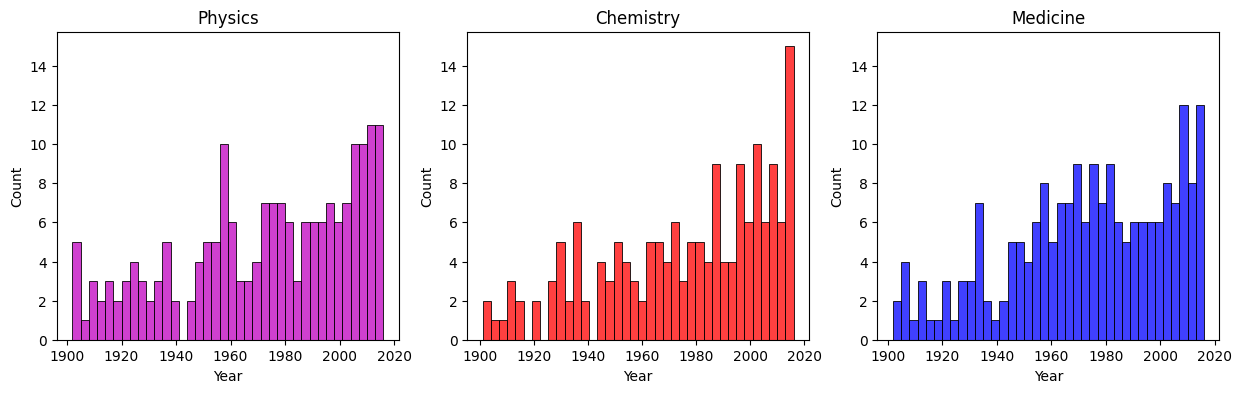

In [25]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,3,1)
plt.title("Physics")
sb.histplot(data=year_as_index[year_as_index["Category"]=="Physics"], x="Year", binwidth=3, color="m")
plt.subplot(1,3,2,sharey=ax)
plt.title("Chemistry")
sb.histplot(data=year_as_index[year_as_index["Category"]=="Chemistry"], x="Year", binwidth=3, color="r")
plt.subplot(1,3,3,sharey=ax)
plt.title("Medicine")
sb.histplot(data=year_as_index[year_as_index["Category"]=="Medicine"], x="Year", binwidth=3, color="b")
plt.show()

I seems that over the years, more collaborative Nobel Prizes in these categories have been awarded.

Altogether, it is possible that a significant factor in the way some countries were overrepresented in terms of Nobel laureates per capita is that most of them have produced a great number of Nobel laureates in scientific categories, and the prizes were awarded to several people in these countries, which skewed the results in their favor.

In conclusion, my hypothesis that western nations rank at the top in terms of Nobel Prize laureates per capita turned out to be correct. In particular, the less populous nations perfmormed even better in this statistic: They still have a supportive environment that promotes the success of Nobel laureates, and their smaller population amplifies their performance in relation to the other countries. The top performer - Saint Lucia - is also technically part of North America. Sweden, the country Alfred Nobel is from, turned out to be the best per capita performer with a population above 1 million.

Some results have surprised me: I didn't expect to see South American countries perform so poorly in this statistic, with Brazil being the worst per capita performer out of all 55 countries which had data of Nobel laureates. I've also learned that the statistics I've measured are skewed in favor of Nobel laureates in scientific categories, while several Nobel Peace Prizes were excluded from the measurements in this project.